<a href="https://colab.research.google.com/github/latruonghai/MyProJect/blob/master/ComputerVision/Recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 104kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=4e1b6ffcc00f515bbfee72e99e246709cca12c0421f3f712fb7d7f892e873b47
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
import pickle
"""with open('/content/gdrive/My Drive/ML1/lr.sav','rb') as f:
  model_lr = pickle.load(open(f))"""
model_lr = pickle.load(open('/content/gdrive/My Drive/lr_model_new.sav','rb'))
model_svc = pickle.load(open('/content/gdrive/My Drive/svc_model_news.sav','rb'))
model_svc_new = pickle.load(open('/content/gdrive/My Drive/OpenCv/svc.sav','rb'))

In [4]:
#import CropFace
import os
import cv2
import face_recognition
import dlib
from skimage.feature import hog
from skimage import exposure
from skimage.color import rgb2gray
import numpy as np
from skimage import io
from google.colab.patches import cv2_imshow
path_train = 'gdrive/My Drive/OpenCv/Train'
path_test = 'gdrive/My Drive/OpenCv/Test'


In [5]:
# With face_recognize
def face_recognize (paths):
  img = cv2.imread(paths)
  #img = cv2.resize(img,(50,50))
  imgs = face_recognition.face_encodings(img)
  if len(imgs)>0:
    return imgs[0]
  else:
    return []
def cvrt_fr(path):
  image = []
  lable = []
  for folder in os.listdir(path):
    for files in os.listdir(path + '/' + folder):
      files_name = path + '/' + folder + '/' + files
      imgs = face_recognize(files_name)
      if len(imgs)>0:
        image.append(imgs)
        lable.append(folder)
      else:
        continue
  return image, lable


In [6]:
# With Object_detection

def obj_Detect(img):
  img = cv2.resize(img,(216,216))
  img = rgb2gray(img)
      # Chuyen hinh anh ve dang cac dang object
  fd_perer, imgs_per = hog(img, orientations=8, pixels_per_cell=(8, 8),
              cells_per_block=(3, 3), visualize=True)
  imgs_per = exposure.rescale_intensity(imgs_per,in_range = (0,0.04))
      #img_canny = canny(img, sigma=2)
      #hog()

      #imgss = np.round(img.flatten(), 2)
      #print(imgss)
  imgs = np.reshape(imgs_per,216*216)
  return imgs
  #return np.round(np.asarray([imgs]),2)
# Chuyen hang loat anh
def cvrt_od(path):
  image = []
  lable = []

  for folder in os.listdir(path):
    for files in os.listdir(path + '/' + folder):
      files_name = path + '/' + folder + '/' + files
      img = io.imread(files_name)
      imgs = obj_Detect(img)
      image.append(imgs)
      lable.append(folder)

  return np.round(np.asarray(image),2),np.asarray(lable)

In [7]:
#Doc Anh
def read_path(path,fr = 0):
  if fr==1:
   return cvrt_fr(path)
  else:
    return cvrt_od(path)

In [158]:
# Cat va du doan anh

def crDect_face(path,fn):

  faceCasCade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
  cap = cv2.VideoCapture(0)

  # Doc hinh

  img = cv2.imread(path)
  img  = cv2.resize(img,(400,int(img.shape[0]*400/img.shape[1])))
  img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
  img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
  # convert the YUV image back to RGB format
  
  img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
      #grayImag = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  face = faceCasCade.detectMultiScale(
          img_output,
          scaleFactor = 1.1,
          minNeighbors = 5,
          minSize = (30,30))
  for (x,y,w,h) in face:
    #sampleNum=sampleNum+1
    image = img[y:y+h,x:x+w]
    result = eval(fn+'(image)')
          #Lưu ảnh khuôn mặt vào thư mục có tên(creatình
          #if not os.path.exists(path +'/'+createf): os.mkdir(path +'/'+createf)
          # Thểm ảnh xoay
          # Thêm ảnh đã cắt
          #cv2.imwrite(path+'/'+createf+"/"+name_file+'-'+ str(sampleNum) + ".jpg", cv2.resize(image,(216,216)))
      # Hiển thị ra màn hình
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0), 2)
    cv2.putText(img, result[0], (x-10, y-10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    print(x,y)

          #if sampleNum>200:
              #break
  cv2_imshow(cv2.resize(img,(500,int(img.shape[0]*500/img.shape[1]))))
  return image
# Dua anh ve dinh dang object cua model_svc_thuong


In [9]:
# Voi Face_recognition
img_size = 50
def svc_det_fr(image):
  #img = cv2.imread(path)
  # Face Recognition
  img_enc=face_recognition.face_encodings(image)
  result = model_svc_new.predict(img_enc[0].reshape(1,-1)) if len(img_enc)!=0 else ['unknown']
  return result 
  

In [10]:
# Voi SVC_object_detection
def svc_det_od(image):
  imgs = np.round(np.asarray([obj_Detect(image)]),2)
  return model_svc.predict(imgs)

In [11]:
mode_1 = "svc_det_fr"

mode_2 = "svc_det_od"
# Insert Picture

image = cv2.imread(paths)

NameError: ignored

Mode: SVC with face recognition:

197 25
198 1


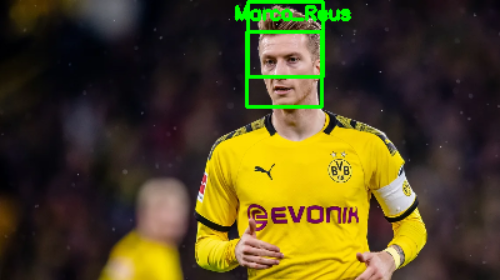

In [172]:
paths = "/content/Reus.jpg"
image = cv2.imread(paths)
print("Mode: SVC with face recognition:\n")
img = crDect_face(paths,mode_1)
#test_x = read(img)
#pred_svc = model_svc.predict(test_x)
#pred_lr = model_lr.predict(test_x)

Mode: SVC with object detection:

197 25
198 1


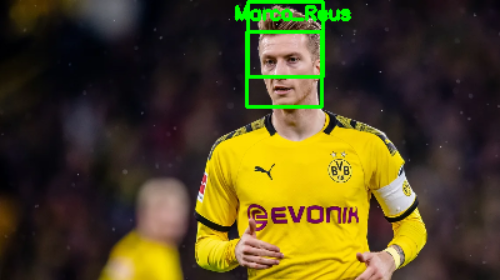

In [173]:
print("Mode: SVC with object detection:\n")
img = crDect_face(paths,mode_2)

In [163]:
path_train = 'gdrive/My Drive/OpenCv/Train'
%time x_train,y_train = read_path(path_train)
path_test = 'gdrive/My Drive/OpenCv/Test'
%time x_test, y_test =read_path(path_test)
# Model higher
#%time X_train,Y_train = read_path(path_train,1)
#%time X_test,Y_test = read_path(path_test,1)

CPU times: user 2min 15s, sys: 1.1 s, total: 2min 16s
Wall time: 2min 34s
CPU times: user 33 s, sys: 187 ms, total: 33.1 s
Wall time: 36 s


In [54]:
y_train

array(['Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy',
       'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_Minzy', 'Hoa_

In [164]:
from sklearn.svm import SVC
#svc =SVC(kernel = 'rbf',C = 5,gamma = 0.0005)
#svc.fit(x_train,y_train)
model_lr.fit(x_train,y_train)
model_svc.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('svc',
                 SVC(C=5, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.0005,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [168]:
from sklearn.metrics import accuracy_score
pred = model_lr.predict(x_test)
print(accuracy_score(y_test,pred))

0.685


In [30]:
%time model_svc_new.fit(X_train,Y_train)

CPU times: user 50.9 ms, sys: 0 ns, total: 50.9 ms
Wall time: 56.5 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [169]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[16  0  0  1  0  0  2  0  0  1]
 [ 0 12  0  3  0  0  2  0  0  3]
 [ 0  1 15  2  1  0  0  1  0  0]
 [ 2  1  2 15  0  0  0  0  0  0]
 [ 3  0  0  2 14  0  0  0  1  0]
 [ 0  0  0  3  1 12  0  0  2  2]
 [ 0  0  2  1  0  0 14  3  0  0]
 [ 0  0  2  2  0  0  2 14  0  0]
 [ 2  1  0  5  1  0  0  0 11  0]
 [ 0  2  0  2  0  0  1  1  0 14]]
              precision    recall  f1-score   support

         Den       0.70      0.80      0.74        20
        Erik       0.71      0.60      0.65        20
   Hoa_Minzy       0.71      0.75      0.73        20
         MTP       0.42      0.75      0.54        20
  Marco_Reus       0.82      0.70      0.76        20
       Messi       1.00      0.60      0.75        20
       MyTam       0.67      0.70      0.68        20
        NDLN       0.74      0.70      0.72        20
     Ronaldo       0.79      0.55      0.65        20
   TranThanh       0.70      0.70      0.70        20

    accuracy                           0.69       200
   macro avg       

In [49]:
  import pickle
files = open("/content/gdrive/My Drive/OpenCv/svc.sav",'wb')
pickle.dump(model_svc_new,files)

In [167]:
files = open("/content/gdrive/My Drive/OpenCv/predict_within_10_people.sav",'wb')
pickle.dump(model_svc,files)